In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl

### PLANTEAMIENTO DE HIPOTESIS

1. "El Athletic Club tiende a ser cada vez menos goleador pero, a la vez, encaja menos goles."

2. "El Athletic Club tiene un desempe√±o significativamente mejor en partidos en casa en comparaci√≥n con partidos fuera."

3. "El Athletic Club tiende a remontar partidos cuando est√° perdiendo al descanso y juega de local". Se puede comparar con la misma situaci√≥n pero con los partidos de fuera de casa y ver el historico o evloucion de la tasa de remontadas en casa.


## 1. Cargar Dataset


In [24]:
data = pd.read_csv("LaLiga_Matches.csv")
data

Season        Date    HomeTeam    AwayTeam  FTHG  FTAG FTR  HTHG  \
0      1995-96  02-09-1995   La Coruna    Valencia     3     0   H   2.0   
1      1995-96  02-09-1995    Sp Gijon    Albacete     3     0   H   3.0   
2      1995-96  03-09-1995  Ath Bilbao   Santander     4     0   H   2.0   
3      1995-96  03-09-1995  Ath Madrid    Sociedad     4     1   H   1.0   
4      1995-96  03-09-1995       Celta  Compostela     0     1   A   0.0   
...        ...         ...         ...         ...   ...   ...  ..   ...   
10878  2023-24  01-10-2023     Almeria     Granada     3     3   D   3.0   
10879  2023-24  01-10-2023      Alaves     Osasuna     0     2   A   0.0   
10880  2023-24  01-10-2023  Ath Madrid       Cadiz     3     2   H   1.0   
10881  2023-24  01-10-2023       Betis    Valencia     3     0   H   1.0   
10882  2023-24  02-10-2023  Las Palmas       Celta     2     1   H   0.0   

       HTAG HTR  
0       0.0   H  
1       0.0   H  
2       0.0   H  
3       1.0   D  
4       0.0   D  
...     ...  ..  
10878   0.0   H  
10879   1.0   A  
10880   2.0   A  
10881   0.0   H  
10882   0.0   D  

[10883 rows x 10 columns]

**1.1 Verificar NaNs y corregir datos**

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10883 entries, 0 to 10882
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Season    10883 non-null  object 
 1   Date      10883 non-null  object 
 2   HomeTeam  10883 non-null  object 
 3   AwayTeam  10883 non-null  object 
 4   FTHG      10883 non-null  int64  
 5   FTAG      10883 non-null  int64  
 6   FTR       10883 non-null  object 
 7   HTHG      10881 non-null  float64
 8   HTAG      10881 non-null  float64
 9   HTR       10881 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 850.4+ KB


In [26]:
filas_con_missing = data[data.isnull().any(axis=1)]

print(filas_con_missing)

       Season        Date    HomeTeam   AwayTeam  FTHG  FTAG FTR  HTHG  HTAG  \
136   1995-96  19-11-1995  Ath Bilbao  La Coruna     1     0   H   NaN   NaN   
1472  1998-99  10-01-1999  Valladolid      Betis     0     3   A   NaN   NaN   

      HTR  
136   NaN  
1472  NaN  


**1.2 Procedo a checkear los resultados en internet**

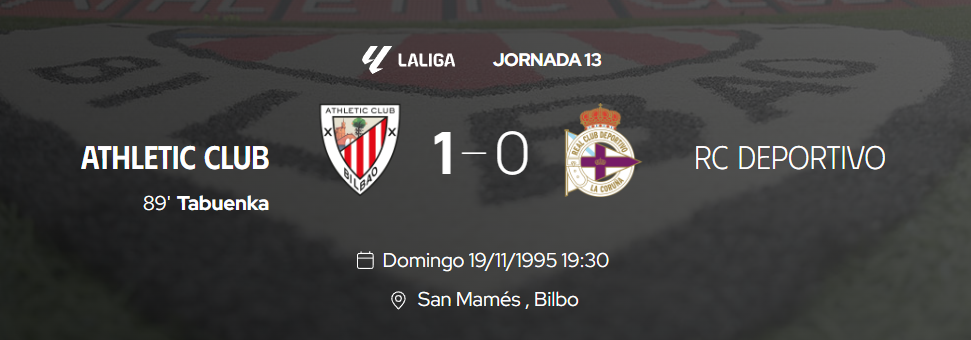

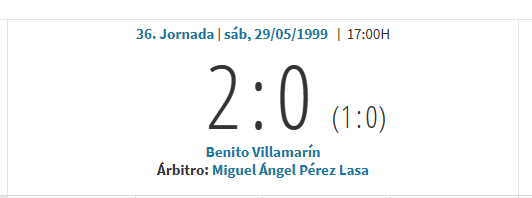

**1.3 Hago los cambios**

In [27]:
data.loc[136, 'HTHG'] = 0
data.loc[136, 'HTAG'] = 0
data.loc[136, 'HTR'] = "D"


data.loc[1472, 'HTHG'] = 1
data.loc[1472, 'HTAG'] = 0
data.loc[1472, 'HTR'] = "H"

filas_corregidas = data.loc[[136,1472]]
filas_corregidas

Season        Date    HomeTeam   AwayTeam  FTHG  FTAG FTR  HTHG  HTAG  \
136   1995-96  19-11-1995  Ath Bilbao  La Coruna     1     0   H   0.0   0.0   
1472  1998-99  10-01-1999  Valladolid      Betis     0     3   A   1.0   0.0   

     HTR  
136    D  
1472   H

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10883 entries, 0 to 10882
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Season    10883 non-null  object 
 1   Date      10883 non-null  object 
 2   HomeTeam  10883 non-null  object 
 3   AwayTeam  10883 non-null  object 
 4   FTHG      10883 non-null  int64  
 5   FTAG      10883 non-null  int64  
 6   FTR       10883 non-null  object 
 7   HTHG      10883 non-null  float64
 8   HTAG      10883 non-null  float64
 9   HTR       10883 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 850.4+ KB


### RESUMEN DE LAS SIGLAS

1. **FTHG** - Number of goals scored by Home Team.
2. **FTAG** - Number of goals scored by Away Team.
3. **FTR** - Full time result.
4. **HTHG** - Number of goals scored by Home Team at Half time.
5. **HTAG** - Number of goals scored by Away Team at Half time.
6. **HTR** - Half time result.
7. **H** - Home Team.
8. **A** - Away Team.
9. **D** - Draw.

## 2. Eliminar las filas de la temporada 23-24
      Est√° incompleta y la rellenaremos mas adelante con el dataframe completo de esa temporada

In [29]:
to_drop = data[data['Season'].isin(['2023-24'])].index
data.drop(index=to_drop,inplace=True)
data

Season        Date    HomeTeam    AwayTeam  FTHG  FTAG FTR  HTHG  \
0      1995-96  02-09-1995   La Coruna    Valencia     3     0   H   2.0   
1      1995-96  02-09-1995    Sp Gijon    Albacete     3     0   H   3.0   
2      1995-96  03-09-1995  Ath Bilbao   Santander     4     0   H   2.0   
3      1995-96  03-09-1995  Ath Madrid    Sociedad     4     1   H   1.0   
4      1995-96  03-09-1995       Celta  Compostela     0     1   A   0.0   
...        ...         ...         ...         ...   ...   ...  ..   ...   
10799  2022-23  04-06-2023       Betis    Valencia     1     1   D   1.0   
10800  2022-23  04-06-2023       Celta   Barcelona     2     1   H   1.0   
10801  2022-23  04-06-2023       Elche       Cadiz     1     1   D   0.0   
10802  2022-23  04-06-2023     Espanol     Almeria     3     3   D   1.0   
10803  2022-23  04-06-2023  Valladolid      Getafe     0     0   D   0.0   

       HTAG HTR  
0       0.0   H  
1       0.0   H  
2       0.0   H  
3       1.0   D  
4       0.0   D  
...     ...  ..  
10799   0.0   H  
10800   0.0   H  
10801   1.0   A  
10802   1.0   D  
10803   0.0   D  

[10804 rows x 10 columns]

**2.1. Checkear si no est√°n esas filas con tail() y unique**

In [30]:
print(data["Season"].tail())
print()
print(data["Season"].unique())

10799    2022-23
10800    2022-23
10801    2022-23
10802    2022-23
10803    2022-23
Name: Season, dtype: object

['1995-96' '1996-97' '1997-98' '1998-99' '1999-2000' '2000-01' '2001-02'
 '2002-03' '2003-04' '2004-05' '2005-06' '2006-07' '2007-08' '2008-09'
 '2009-10' '2010-11' '2011-12' '2012-13' '2013-14' '2014-15' '2015-16'
 '2016-17' '2017-18' '2018-19' '2019-20' '2020-21' '2021-22' '2022-23']


### VICTORIAS EN CASA

In [31]:
# ath_home = data[data["HomeTeam"] == "Ath Bilbao"]

# # Estad√≠sticas para los partidos en casa
# home_stats = ath_home.groupby("Season").agg(
#     victorias=("FTR", "count"),  # N√∫mero total de partidos en casa ganados
#     goals_favor=("FTHG", "sum"),   # Goles anotados como local
#     goals_contra=("FTAG", "sum")  # Goles encajados como local
# ).reset_index()

# home_stats

### VICTORIAS FUERA

In [32]:
# ath_away = data[data["AwayTeam"] == "Ath Bilbao"]

## 3. Cargar Dataset temporada 23-24

In [33]:
liga_23_24 = pd.read_csv("SP1_23_24.csv")
liga_23_24

Div        Date   Time     HomeTeam     AwayTeam  FTHG  FTAG FTR  HTHG  \
0    SP1  11/08/2023  18:30      Almeria    Vallecano     0     2   A     0   
1    SP1  11/08/2023  21:00      Sevilla     Valencia     1     2   A     0   
2    SP1  12/08/2023  16:00     Sociedad       Girona     1     1   D     1   
3    SP1  12/08/2023  18:30   Las Palmas     Mallorca     1     1   D     1   
4    SP1  12/08/2023  20:30   Ath Bilbao  Real Madrid     0     2   A     0   
..   ...         ...    ...          ...          ...   ...   ...  ..   ...   
375  SP1  25/05/2024  20:00  Real Madrid        Betis     0     0   D     0   
376  SP1  26/05/2024  13:00       Getafe     Mallorca     1     2   A     0   
377  SP1  26/05/2024  15:15        Celta     Valencia     2     2   D     0   
378  SP1  26/05/2024  15:15   Las Palmas       Alaves     1     1   D     0   
379  SP1  26/05/2024  20:00      Sevilla    Barcelona     1     2   A     1   

     HTAG  ... AvgC<2.5  AHCh  B365CAHH  B365CAHA  PCAHH  PCAHA  MaxCAHH  \
0       2  ...     1.64  0.00      1.85      2.08   1.86   2.07     1.91   
1       0  ...     1.61 -0.50      1.94      1.99   1.94   1.98     1.96   
2       0  ...     1.72 -0.75      2.05      1.75   2.10   1.82     2.14   
3       0  ...     1.40 -0.25      2.18      1.77   2.20   1.77     2.21   
4       2  ...     1.89  0.25      1.99      1.94   1.99   1.93     2.10   
..    ...  ...      ...   ...       ...       ...    ...    ...      ...   
375     0  ...     3.43 -2.00      1.85      2.08   1.87   2.04     2.01   
376     0  ...     1.58 -0.25      2.04      1.89   2.05   1.88     2.06   
377     1  ...     2.04 -0.50      1.92      2.01   1.92   2.01     1.98   
378     0  ...     1.96 -0.25      2.06      1.87   2.06   1.88     2.06   
379     1  ...     2.71  0.75      2.06      1.87   2.06   1.87     2.09   

     MaxCAHA  AvgCAHH  AvgCAHA  
0       2.09     1.86     2.01  
1       2.00     1.93     1.94  
2       1.90     2.04     1.82  
3       1.79     2.15     1.75  
4       1.96     1.95     1.90  
..       ...      ...      ...  
375     2.09     1.94     1.93  
376     1.93     1.97     1.87  
377     2.01     1.94     1.91  
378     1.90     2.01     1.84  
379     2.00     1.97     1.88  

[380 rows x 105 columns]

In [34]:
liga_23_24.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Columns: 105 entries, Div to AvgCAHA
dtypes: float64(82), int64(16), object(7)
memory usage: 311.8+ KB


**3.1 Limpiar las columnas para la temporada 2023-2024**

In [35]:
liga_23_24_filtered = liga_23_24

liga_23_24_filtered["Season"] = "2023-24"

liga_23_24_filtered = liga_23_24[["Season", "Date", "HomeTeam", "AwayTeam", "FTHG", "FTAG", "FTR", "HTHG", "HTAG", "HTR"]]

liga_23_24_filtered

Season        Date     HomeTeam     AwayTeam  FTHG  FTAG FTR  HTHG  \
0    2023-24  11/08/2023      Almeria    Vallecano     0     2   A     0   
1    2023-24  11/08/2023      Sevilla     Valencia     1     2   A     0   
2    2023-24  12/08/2023     Sociedad       Girona     1     1   D     1   
3    2023-24  12/08/2023   Las Palmas     Mallorca     1     1   D     1   
4    2023-24  12/08/2023   Ath Bilbao  Real Madrid     0     2   A     0   
..       ...         ...          ...          ...   ...   ...  ..   ...   
375  2023-24  25/05/2024  Real Madrid        Betis     0     0   D     0   
376  2023-24  26/05/2024       Getafe     Mallorca     1     2   A     0   
377  2023-24  26/05/2024        Celta     Valencia     2     2   D     0   
378  2023-24  26/05/2024   Las Palmas       Alaves     1     1   D     0   
379  2023-24  26/05/2024      Sevilla    Barcelona     1     2   A     1   

     HTAG HTR  
0       2   A  
1       0   D  
2       0   H  
3       0   H  
4       2   A  
..    ...  ..  
375     0   D  
376     0   D  
377     1   A  
378     0   D  
379     1   D  

[380 rows x 10 columns]

## 4. Unir el dataframe de de la temporada 2023-2024 con el main dataframe

In [36]:
data = pd.concat([data, liga_23_24_filtered], ignore_index=True)
data.tail()

Season        Date     HomeTeam   AwayTeam  FTHG  FTAG FTR  HTHG  \
11179  2023-24  25/05/2024  Real Madrid      Betis     0     0   D   0.0   
11180  2023-24  26/05/2024       Getafe   Mallorca     1     2   A   0.0   
11181  2023-24  26/05/2024        Celta   Valencia     2     2   D   0.0   
11182  2023-24  26/05/2024   Las Palmas     Alaves     1     1   D   0.0   
11183  2023-24  26/05/2024      Sevilla  Barcelona     1     2   A   1.0   

       HTAG HTR  
11179   0.0   D  
11180   0.0   D  
11181   1.0   A  
11182   0.0   D  
11183   1.0   D

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11184 entries, 0 to 11183
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Season    11184 non-null  object 
 1   Date      11184 non-null  object 
 2   HomeTeam  11184 non-null  object 
 3   AwayTeam  11184 non-null  object 
 4   FTHG      11184 non-null  int64  
 5   FTAG      11184 non-null  int64  
 6   FTR       11184 non-null  object 
 7   HTHG      11184 non-null  float64
 8   HTAG      11184 non-null  float64
 9   HTR       11184 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 873.9+ KB


**4.1 Renombrar "Ath Bilbao" a "Athletic"**

In [38]:
data = data.replace("Ath Bilbao", "Athletic")

#Verificamos que en el main dataframe no contiene "Ath Bilbao"
print(data.isin(["Ath Bilbao"]).sum())
print(data.isin(["Athletic"]).sum())

Season      0
Date        0
HomeTeam    0
AwayTeam    0
FTHG        0
FTAG        0
FTR         0
HTHG        0
HTAG        0
HTR         0
dtype: int64
Season        0
Date          0
HomeTeam    555
AwayTeam    555
FTHG          0
FTAG          0
FTR           0
HTHG          0
HTAG          0
HTR           0
dtype: int64


**4.2 Cambiar el nombre de las columnas**

In [39]:
data = data.rename(columns={"FTHG": "GolesLocal", 
                            "FTAG": "GolesVisitante", 
                            "FTR": "Ganador", 
                            "HTHG": "GolesDescansoLocal",
                            "HTAG": "GolesDescansoVisitante",
                            "HTR": "ResultadoDescanso"       
                            })
data

Season        Date     HomeTeam    AwayTeam  GolesLocal  \
0      1995-96  02-09-1995    La Coruna    Valencia           3   
1      1995-96  02-09-1995     Sp Gijon    Albacete           3   
2      1995-96  03-09-1995     Athletic   Santander           4   
3      1995-96  03-09-1995   Ath Madrid    Sociedad           4   
4      1995-96  03-09-1995        Celta  Compostela           0   
...        ...         ...          ...         ...         ...   
11179  2023-24  25/05/2024  Real Madrid       Betis           0   
11180  2023-24  26/05/2024       Getafe    Mallorca           1   
11181  2023-24  26/05/2024        Celta    Valencia           2   
11182  2023-24  26/05/2024   Las Palmas      Alaves           1   
11183  2023-24  26/05/2024      Sevilla   Barcelona           1   

       GolesVisitante Ganador  GolesDescansoLocal  GolesDescansoVisitante  \
0                   0       H                 2.0                     0.0   
1                   0       H                 3.0                     0.0   
2                   0       H                 2.0                     0.0   
3                   1       H                 1.0                     1.0   
4                   1       A                 0.0                     0.0   
...               ...     ...                 ...                     ...   
11179               0       D                 0.0                     0.0   
11180               2       A                 0.0                     0.0   
11181               2       D                 0.0                     1.0   
11182               1       D                 0.0                     0.0   
11183               2       A                 1.0                     1.0   

      ResultadoDescanso  
0                     H  
1                     H  
2                     H  
3                     D  
4                     D  
...                 ...  
11179                 D  
11180                 D  
11181                 A  
11182                 D  
11183                 D  

[11184 rows x 10 columns]

## 5. Crear nuevas columnas con nuevas m√©tricas

In [40]:
data["GolesPartido"] = data["GolesLocal"] + data["GolesVisitante"]
data["DifGolesDesc"] = data["GolesDescansoLocal"] - data["GolesDescansoVisitante"]
data["DifGolesFinal"] = data["GolesLocal"] - data["GolesVisitante"]
# data['VictoriaLocal'] = (data['Ganador'] == 'H') 
# data['VictoriaVisitante'] = (data['Ganador'] == 'A')
# data["Empate"] = (data['Ganador'] == 'D')

data


Season        Date     HomeTeam    AwayTeam  GolesLocal  \
0      1995-96  02-09-1995    La Coruna    Valencia           3   
1      1995-96  02-09-1995     Sp Gijon    Albacete           3   
2      1995-96  03-09-1995     Athletic   Santander           4   
3      1995-96  03-09-1995   Ath Madrid    Sociedad           4   
4      1995-96  03-09-1995        Celta  Compostela           0   
...        ...         ...          ...         ...         ...   
11179  2023-24  25/05/2024  Real Madrid       Betis           0   
11180  2023-24  26/05/2024       Getafe    Mallorca           1   
11181  2023-24  26/05/2024        Celta    Valencia           2   
11182  2023-24  26/05/2024   Las Palmas      Alaves           1   
11183  2023-24  26/05/2024      Sevilla   Barcelona           1   

       GolesVisitante Ganador  GolesDescansoLocal  GolesDescansoVisitante  \
0                   0       H                 2.0                     0.0   
1                   0       H                 3.0                     0.0   
2                   0       H                 2.0                     0.0   
3                   1       H                 1.0                     1.0   
4                   1       A                 0.0                     0.0   
...               ...     ...                 ...                     ...   
11179               0       D                 0.0                     0.0   
11180               2       A                 0.0                     0.0   
11181               2       D                 0.0                     1.0   
11182               1       D                 0.0                     0.0   
11183               2       A                 1.0                     1.0   

      ResultadoDescanso  GolesPartido  DifGolesDesc  DifGolesFinal  
0                     H             3           2.0              3  
1                     H             3           3.0              3  
2                     H             4           2.0              4  
3                     D             5           0.0              3  
4                     D             1           0.0             -1  
...                 ...           ...           ...            ...  
11179                 D             0           0.0              0  
11180                 D             3           0.0             -1  
11181                 A             4          -1.0              0  
11182                 D             2           0.0              0  
11183                 D             3           0.0             -1  

[11184 rows x 13 columns]

**5.1 Filtrar todos los partidos del Athletic**

In [41]:
partidos_ath = data[(data['HomeTeam'] == 'Athletic') | (data['AwayTeam'] == 'Athletic')]

partidos_ath

Season        Date     HomeTeam    AwayTeam  GolesLocal  \
2      1995-96  03-09-1995     Athletic   Santander           4   
14     1995-96  09-09-1995  Real Madrid    Athletic           1   
22     1995-96  16-09-1995     Athletic  Ath Madrid           0   
39     1995-96  24-09-1995       Oviedo    Athletic           0   
44     1995-96  30-09-1995     Athletic    Sp Gijon           2   
...        ...         ...          ...         ...         ...   
11134  2023-24  03/05/2024       Getafe    Athletic           0   
11148  2023-24  11/05/2024     Athletic     Osasuna           2   
11159  2023-24  15/05/2024        Celta    Athletic           2   
11165  2023-24  19/05/2024     Athletic     Sevilla           2   
11178  2023-24  25/05/2024    Vallecano    Athletic           0   

       GolesVisitante Ganador  GolesDescansoLocal  GolesDescansoVisitante  \
2                   0       H                 2.0                     0.0   
14                  2       A                 0.0                     0.0   
22                  2       A                 0.0                     1.0   
39                  0       D                 0.0                     0.0   
44                  1       H                 1.0                     0.0   
...               ...     ...                 ...                     ...   
11134               2       A                 0.0                     1.0   
11148               2       D                 0.0                     1.0   
11159               1       H                 0.0                     1.0   
11165               0       H                 2.0                     0.0   
11178               1       A                 0.0                     0.0   

      ResultadoDescanso  GolesPartido  DifGolesDesc  DifGolesFinal  
2                     H             4           2.0              4  
14                    D             3           0.0             -1  
22                    A             2          -1.0             -2  
39                    D             0           0.0              0  
44                    H             3           1.0              1  
...                 ...           ...           ...            ...  
11134                 A             2          -1.0             -2  
11148                 A             4          -1.0              0  
11159                 A             3          -1.0              1  
11165                 H             2           2.0              2  
11178                 D             1           0.0             -1  

[1110 rows x 13 columns]

En este punto hay que tener en cuenta **dos tipos de remontadas: la total y la parcial**. Consideramos remontada total a aquella donde se consiguen los 3 puntos, es decir, la victoria. La parcial, en contrapartida, simboliza el empate. Aunque es m√°s interesante fijarnos solo en la victoria, tambi√©n hay que atender a los puntos conseguidos mediante empate cuando se ha ido perdiendo al descanso, ya que al final del todo, esos punto tambi√©n ayudan a sumar y a escalar en la tabla.

**5.2 Crear columnas para saber si el Athletic gan√≥ o perdi√≥ y checkear si iba perdiendo al descanso**

In [60]:
partidos_ath.loc[:, 'VictoriaAthletic']  = ((partidos_ath['HomeTeam'] == 'Athletic') & (partidos_ath['Ganador'] == 'H')) | \
                                   ((partidos_ath['AwayTeam'] == 'Athletic') & (partidos_ath['Ganador'] == 'A'))

partidos_ath.loc[:, 'EmpateAthletic'] = ((partidos_ath['HomeTeam'] == 'Athletic') & (partidos_ath['Ganador'] == 'D')) | \
                                   ((partidos_ath['AwayTeam'] == 'Athletic') & (partidos_ath['Ganador'] == 'D'))

partidos_ath.loc[:, 'DerrotaDescanso'] = ((partidos_ath['HomeTeam'] == 'Athletic') & (partidos_ath['ResultadoDescanso'] == 'A')) | \
                               ((partidos_ath['AwayTeam'] == 'Athletic') & (partidos_ath['ResultadoDescanso'] == 'H'))

partidos_ath

Season        Date     HomeTeam    AwayTeam  GolesLocal  \
2      1995-96  03-09-1995     Athletic   Santander           4   
14     1995-96  09-09-1995  Real Madrid    Athletic           1   
22     1995-96  16-09-1995     Athletic  Ath Madrid           0   
39     1995-96  24-09-1995       Oviedo    Athletic           0   
44     1995-96  30-09-1995     Athletic    Sp Gijon           2   
...        ...         ...          ...         ...         ...   
11134  2023-24  03/05/2024       Getafe    Athletic           0   
11148  2023-24  11/05/2024     Athletic     Osasuna           2   
11159  2023-24  15/05/2024        Celta    Athletic           2   
11165  2023-24  19/05/2024     Athletic     Sevilla           2   
11178  2023-24  25/05/2024    Vallecano    Athletic           0   

       GolesVisitante Ganador  GolesDescansoLocal  GolesDescansoVisitante  \
2                   0       H                 2.0                     0.0   
14                  2       A                 0.0                     0.0   
22                  2       A                 0.0                     1.0   
39                  0       D                 0.0                     0.0   
44                  1       H                 1.0                     0.0   
...               ...     ...                 ...                     ...   
11134               2       A                 0.0                     1.0   
11148               2       D                 0.0                     1.0   
11159               1       H                 0.0                     1.0   
11165               0       H                 2.0                     0.0   
11178               1       A                 0.0                     0.0   

      ResultadoDescanso  GolesPartido  DifGolesDesc  DifGolesFinal  \
2                     H             4           2.0              4   
14                    D             3           0.0             -1   
22                    A             2          -1.0             -2   
39                    D             0           0.0              0   
44                    H             3           1.0              1   
...                 ...           ...           ...            ...   
11134                 A             2          -1.0             -2   
11148                 A             4          -1.0              0   
11159                 A             3          -1.0              1   
11165                 H             2           2.0              2   
11178                 D             1           0.0             -1   

       VictoriaAthletic  EmpateAthletic  DerrotaDescanso  
2                  True           False            False  
14                 True           False            False  
22                False           False             True  
39                False            True            False  
44                 True           False            False  
...                 ...             ...              ...  
11134              True           False            False  
11148             False            True             True  
11159             False           False            False  
11165              True           False            False  
11178              True           False            False  

[1110 rows x 16 columns]

**5.3 Filtrar todos los partidos donde se remont√≥ (tanto total como parcialmente) tras ir perdiendo al descanso**

In [43]:
remontada_total_ath = partidos_ath[(partidos_ath['VictoriaAthletic']) & (partidos_ath['DerrotaDescanso'])]
remontada_total_ath

Season        Date   HomeTeam    AwayTeam  GolesLocal  GolesVisitante  \
477   1996-97  08-09-1996   Athletic   Vallecano           3               2   
508   1996-97  28-09-1996  Santander    Athletic           1               2   
605   1996-97  23-11-1996   Athletic   Barcelona           2               1   
715   1996-97  16-02-1997   Athletic      Oviedo           3               2   
1074  1997-98  13-12-1997   Athletic       Celta           2               1   
1226  1997-98  29-03-1998   Athletic   Santander           4               3   
1454  1998-99  03-01-1999   Athletic  Valladolid           2               1   
2557  2001-02  11-11-2001      Celta    Athletic           2               3   
2821  2001-02  11-05-2002   Tenerife    Athletic           2               3   
2898  2002-03  03-11-2002   Athletic       Celta           2               1   
2917  2002-03  17-11-2002   Athletic   Vallecano           2               1   
2976  2002-03  04-01-2003  Santander    Athletic           3               4   
3156  2002-03  18-05-2003     Alaves    Athletic           2               4   
3286  2003-04  29-10-2003   Athletic      Malaga           2               1   
3774  2004-05  22-01-2005   Athletic     Osasuna           4               3   
4328  2005-06  07-05-2006  La Coruna    Athletic           1               2   
4343  2005-06  20-05-2006   Athletic   Barcelona           3               1   
4636  2006-07  15-04-2007   Athletic     Espanol           2               1   
5688  2009-10  07-02-2010   Athletic       Xerez           3               2   
6007  2010-11  12-12-2010   Athletic     Espanol           2               1   
6982  2012-13  19-05-2013   Zaragoza    Athletic           1               2   
7126  2013-14  09-11-2013   Athletic     Levante           2               1   
7143  2013-14  25-11-2013     Malaga    Athletic           1               2   
7203  2013-14  20-01-2014   Athletic  Valladolid           4               2   
7746  2014-15  17-05-2015      Elche    Athletic           2               3   
8220  2016-17  16-10-2016   Athletic    Sociedad           3               2   
8338  2016-17  29-01-2017   Athletic    Sp Gijon           2               1   
8353  2016-17  11-02-2017   Athletic   La Coruna           2               1   
9184  2018-19  29-03-2019     Girona    Athletic           1               2   
9409  2019-20  10-11-2019   Athletic     Levante           2               1   
9729  2020-21  31-10-2020   Athletic     Sevilla           2               1   

     Ganador  GolesDescansoLocal  GolesDescansoVisitante ResultadoDescanso  \
477        H                 0.0                     1.0                 A   
508        A                 1.0                     0.0                 H   
605        H                 0.0                     1.0                 A   
715        H                 0.0                     1.0                 A   
1074       H                 0.0                     1.0                 A   
1226       H                 0.0                     2.0                 A   
1454       H                 0.0                     1.0                 A   
2557       A                 1.0                     0.0                 H   
2821       A                 2.0                     1.0                 H   
2898       H                 0.0                     1.0                 A   
2917       H                 0.0                     1.0                 A   
2976       A                 3.0                     1.0                 H   
3156       A                 2.0                     1.0                 H   
3286       H                 0.0                     1.0                 A   
3774       H                 0.0                     1.0                 A   
4328       A                 1.0                     0.0                 H   
4343       H                 0.0                     1.0                 A   
4636       H                 0.0          

In [44]:
remontada_parcial_ath = partidos_ath[(partidos_ath['EmpateAthletic']) & (partidos_ath['DerrotaDescanso'])]
remontada_parcial_ath

Season        Date    HomeTeam    AwayTeam  GolesLocal  \
239      1995-96  21-01-1996   Santander    Athletic           1   
303      1995-96  25-02-1996     Sevilla    Athletic           1   
448      1995-96  19-05-1996    Sociedad    Athletic           2   
628      1996-97  08-12-1996    Athletic  Ath Madrid           1   
673      1996-97  19-01-1997   La Coruna    Athletic           2   
710      1996-97  09-02-1997   Vallecano    Athletic           1   
735      1996-97  23-02-1997    Athletic   Santander           2   
983      1997-98  15-10-1997    Valencia    Athletic           1   
1186     1997-98  01-03-1998    Athletic    Sp Gijon           2   
1564     1998-99  20-03-1999     Espanol    Athletic           1   
1827   1999-2000  12-12-1999       Celta    Athletic           1   
1913   1999-2000  12-02-2000    Athletic    Mallorca           1   
1937   1999-2000  27-02-2000    Athletic      Malaga           2   
2254     2000-01  27-01-2001    Athletic   La Coruna           2   
2314     2000-01  10-03-2001    Athletic  Villarreal           1   
2333     2000-01  18-03-2001    Zaragoza    Athletic           2   
2479     2001-02  23-09-2001    Athletic    Valencia           2   
2909     2002-03  10-11-2002  Ath Madrid    Athletic           3   
3026     2002-03  09-02-2003   Barcelona    Athletic           2   
3806     2004-05  13-02-2005    Athletic       Betis           4   
4094     2005-06  03-12-2005    Athletic  Ath Madrid           1   
4162     2005-06  22-01-2006    Sociedad    Athletic           3   
4246     2005-06  22-03-2006    Athletic     Espanol           1   
4304     2005-06  29-04-2006       Betis    Athletic           1   
4435     2006-07  11-11-2006    Valencia    Athletic           1   
4598     2006-07  11-03-2007       Celta    Athletic           1   
4925     2007-08  27-01-2008    Athletic   Barcelona           1   
5021     2007-08  30-03-2008  Recreativo    Athletic           1   
5267     2008-09  04-01-2009    Athletic     Espanol           1   
5328     2008-09  15-02-2009    Athletic  Recreativo           1   
5887     2010-11  18-09-2010    Sp Gijon    Athletic           2   
6225     2010-11  15-05-2011    Athletic      Malaga           1   
6483     2011-12  26-02-2012  Villarreal    Athletic           2   
6558     2011-12  11-04-2012     Granada    Athletic           2   
6658     2012-13  16-09-2012     Espanol    Athletic           3   
6834     2012-13  01-02-2013  Valladolid    Athletic           2   
7080     2013-14  06-10-2013    Athletic    Valencia           1   
7110     2013-14  31-10-2013    Athletic       Elche           2   
7271     2013-14  09-03-2014    Valencia    Athletic           1   
7532     2014-15  14-12-2014    Sociedad    Athletic           1   
8110     2015-16  24-04-2016     Levante    Athletic           2   
8639     2017-18  19-11-2017    Athletic  Villarreal           1   
8776     2017-18  28-02-2018    Athletic    Valencia           1   
8993     2018-19  24-10-2018   Vallecano    Athletic           1   
9164     2018-19  08-03-2019    Athletic     Espanol           1   
9778     2020-21  12-12-2020    Valencia    Athletic           2   
9902     2020-21  26-02-2021     Levante    Athletic           1   
10141    2021-22  26-10-2021     Espanol    Athletic           1   
10180    2021-22  26-11-2021    Athletic     Granada           2   
10497    2022-23  08-10-2022     Sevilla    Athletic           1   
11148    2023-24  11/05/2024    Athletic     Osasuna           2   

       GolesVisitante Ganador  GolesDescansoLocal  GolesDescansoVisitante  \
239                 1       D                 1.0                     0.0   
303                 1       D                 1.0                     0.0   
448                 2       D                 2.0                     1.0   
628                 1       D                 0.0                     1.0   
673                 2       D                 2.0                     1.0   
710        

**5.4 Filtrar remontadas totales y parciales en casa**

In [45]:
remontadas_casa_total = remontada_total_ath[remontada_total_ath['HomeTeam'] == 'Athletic']
remontadas_casa_total

Season        Date  HomeTeam    AwayTeam  GolesLocal  GolesVisitante  \
477   1996-97  08-09-1996  Athletic   Vallecano           3               2   
605   1996-97  23-11-1996  Athletic   Barcelona           2               1   
715   1996-97  16-02-1997  Athletic      Oviedo           3               2   
1074  1997-98  13-12-1997  Athletic       Celta           2               1   
1226  1997-98  29-03-1998  Athletic   Santander           4               3   
1454  1998-99  03-01-1999  Athletic  Valladolid           2               1   
2898  2002-03  03-11-2002  Athletic       Celta           2               1   
2917  2002-03  17-11-2002  Athletic   Vallecano           2               1   
3286  2003-04  29-10-2003  Athletic      Malaga           2               1   
3774  2004-05  22-01-2005  Athletic     Osasuna           4               3   
4343  2005-06  20-05-2006  Athletic   Barcelona           3               1   
4636  2006-07  15-04-2007  Athletic     Espanol           2               1   
5688  2009-10  07-02-2010  Athletic       Xerez           3               2   
6007  2010-11  12-12-2010  Athletic     Espanol           2               1   
7126  2013-14  09-11-2013  Athletic     Levante           2               1   
7203  2013-14  20-01-2014  Athletic  Valladolid           4               2   
8220  2016-17  16-10-2016  Athletic    Sociedad           3               2   
8338  2016-17  29-01-2017  Athletic    Sp Gijon           2               1   
8353  2016-17  11-02-2017  Athletic   La Coruna           2               1   
9409  2019-20  10-11-2019  Athletic     Levante           2               1   
9729  2020-21  31-10-2020  Athletic     Sevilla           2               1   

     Ganador  GolesDescansoLocal  GolesDescansoVisitante ResultadoDescanso  \
477        H                 0.0                     1.0                 A   
605        H                 0.0                     1.0                 A   
715        H                 0.0                     1.0                 A   
1074       H                 0.0                     1.0                 A   
1226       H                 0.0                     2.0                 A   
1454       H                 0.0                     1.0                 A   
2898       H                 0.0                     1.0                 A   
2917       H                 0.0                     1.0                 A   
3286       H                 0.0                     1.0                 A   
3774       H                 0.0                     1.0                 A   
4343       H                 0.0                     1.0                 A   
4636       H                 0.0                     1.0                 A   
5688       H                 1.0                     2.0                 A   
6007       H                 0.0                     1.0                 A   
7126       H                 0.0                     1.0                 A   
7203       H                 0.0                     1.0                 A   
8220       H                 0.0                     1.0                 A   
8338       H                 0.0                     1.0                 A   
8353       H                 0.0                     1.0                 A   
9409       H                 0.0                     1.0                 A   
9729       H                 0.0                     1.0                 A   

      GolesPartido  DifGolesDesc  DifGolesFinal  VictoriaAthletic  \
477              5          -1.0              1              True   
605              3          -1.0              1              True   
715              5          -1.0              1              True   
1074             3          -1.0              1              True   
1226             7          -2.0              1              True   
1454             3          -1.0              1              True   
2898             3          -1.0              1              True   

In [46]:
remontadas_casa_parcial = remontada_parcial_ath[remontada_parcial_ath['HomeTeam'] == 'Athletic']
remontadas_casa_parcial

Season        Date  HomeTeam    AwayTeam  GolesLocal  \
628      1996-97  08-12-1996  Athletic  Ath Madrid           1   
735      1996-97  23-02-1997  Athletic   Santander           2   
1186     1997-98  01-03-1998  Athletic    Sp Gijon           2   
1913   1999-2000  12-02-2000  Athletic    Mallorca           1   
1937   1999-2000  27-02-2000  Athletic      Malaga           2   
2254     2000-01  27-01-2001  Athletic   La Coruna           2   
2314     2000-01  10-03-2001  Athletic  Villarreal           1   
2479     2001-02  23-09-2001  Athletic    Valencia           2   
3806     2004-05  13-02-2005  Athletic       Betis           4   
4094     2005-06  03-12-2005  Athletic  Ath Madrid           1   
4246     2005-06  22-03-2006  Athletic     Espanol           1   
4925     2007-08  27-01-2008  Athletic   Barcelona           1   
5267     2008-09  04-01-2009  Athletic     Espanol           1   
5328     2008-09  15-02-2009  Athletic  Recreativo           1   
6225     2010-11  15-05-2011  Athletic      Malaga           1   
7080     2013-14  06-10-2013  Athletic    Valencia           1   
7110     2013-14  31-10-2013  Athletic       Elche           2   
8639     2017-18  19-11-2017  Athletic  Villarreal           1   
8776     2017-18  28-02-2018  Athletic    Valencia           1   
9164     2018-19  08-03-2019  Athletic     Espanol           1   
10180    2021-22  26-11-2021  Athletic     Granada           2   
11148    2023-24  11/05/2024  Athletic     Osasuna           2   

       GolesVisitante Ganador  GolesDescansoLocal  GolesDescansoVisitante  \
628                 1       D                 0.0                     1.0   
735                 2       D                 0.0                     1.0   
1186                2       D                 0.0                     2.0   
1913                1       D                 0.0                     1.0   
1937                2       D                 1.0                     2.0   
2254                2       D                 1.0                     2.0   
2314                1       D                 0.0                     1.0   
2479                2       D                 0.0                     1.0   
3806                4       D                 2.0                     3.0   
4094                1       D                 0.0                     1.0   
4246                1       D                 0.0                     1.0   
4925                1       D                 0.0                     1.0   
5267                1       D                 0.0                     1.0   
5328                1       D                 0.0                     1.0   
6225                1       D                 0.0                     1.0   
7080                1       D                 0.0                     1.0   
7110                2       D                 0.0                     1.0   
8639                1       D                 0.0                     1.0   
8776                1       D                 0.0                     1.0   
9164                1       D                 0.0                     1.0   
10180               2       D                 1.0                     2.0   
11148               2       D                 0.0                     1.0   

      ResultadoDescanso  GolesPartido  DifGolesDesc  DifGolesFinal  \
628                   A             2          -1.0              0   
735                   A             4          -1.0              0   
1186                  A             4          -2.0              0   
1913                  A             2          -1.0              0   
1937                  A             4          -1.0              0   
2254                  A             4          -1.0              0   
2314                  A             2          -1.0              0   
2479                  A             4          -1.0              0   
3806                  A             8          -1.0              0   
4094               

**5.5 Filtrar remontadas totales y parciales fuera**

In [47]:
remontadas_fuera_total = remontada_total_ath[remontada_total_ath['AwayTeam'] == 'Athletic']
remontadas_fuera_total

Season        Date   HomeTeam  AwayTeam  GolesLocal  GolesVisitante  \
508   1996-97  28-09-1996  Santander  Athletic           1               2   
2557  2001-02  11-11-2001      Celta  Athletic           2               3   
2821  2001-02  11-05-2002   Tenerife  Athletic           2               3   
2976  2002-03  04-01-2003  Santander  Athletic           3               4   
3156  2002-03  18-05-2003     Alaves  Athletic           2               4   
4328  2005-06  07-05-2006  La Coruna  Athletic           1               2   
6982  2012-13  19-05-2013   Zaragoza  Athletic           1               2   
7143  2013-14  25-11-2013     Malaga  Athletic           1               2   
7746  2014-15  17-05-2015      Elche  Athletic           2               3   
9184  2018-19  29-03-2019     Girona  Athletic           1               2   

     Ganador  GolesDescansoLocal  GolesDescansoVisitante ResultadoDescanso  \
508        A                 1.0                     0.0                 H   
2557       A                 1.0                     0.0                 H   
2821       A                 2.0                     1.0                 H   
2976       A                 3.0                     1.0                 H   
3156       A                 2.0                     1.0                 H   
4328       A                 1.0                     0.0                 H   
6982       A                 1.0                     0.0                 H   
7143       A                 1.0                     0.0                 H   
7746       A                 2.0                     0.0                 H   
9184       A                 1.0                     0.0                 H   

      GolesPartido  DifGolesDesc  DifGolesFinal  VictoriaAthletic  \
508              3           1.0             -1              True   
2557             5           1.0             -1              True   
2821             5           1.0             -1              True   
2976             7           2.0             -1              True   
3156             6           1.0             -2              True   
4328             3           1.0             -1              True   
6982             3           1.0             -1              True   
7143             3           1.0             -1              True   
7746             5           2.0             -1              True   
9184             3           1.0             -1              True   

      EmpateAthletic  DerrotaDescanso  
508            False             True  
2557           False             True  
2821           False             True  
2976           False             True  
3156           False             True  
4328           False             True  
6982           False             True  
7143           False             True  
7746           False             True  
9184           False             True

In [48]:
remontadas_fuera_parcial = remontada_parcial_ath[remontada_parcial_ath['AwayTeam'] == 'Athletic']
remontadas_fuera_parcial

Season        Date    HomeTeam  AwayTeam  GolesLocal  \
239      1995-96  21-01-1996   Santander  Athletic           1   
303      1995-96  25-02-1996     Sevilla  Athletic           1   
448      1995-96  19-05-1996    Sociedad  Athletic           2   
673      1996-97  19-01-1997   La Coruna  Athletic           2   
710      1996-97  09-02-1997   Vallecano  Athletic           1   
983      1997-98  15-10-1997    Valencia  Athletic           1   
1564     1998-99  20-03-1999     Espanol  Athletic           1   
1827   1999-2000  12-12-1999       Celta  Athletic           1   
2333     2000-01  18-03-2001    Zaragoza  Athletic           2   
2909     2002-03  10-11-2002  Ath Madrid  Athletic           3   
3026     2002-03  09-02-2003   Barcelona  Athletic           2   
4162     2005-06  22-01-2006    Sociedad  Athletic           3   
4304     2005-06  29-04-2006       Betis  Athletic           1   
4435     2006-07  11-11-2006    Valencia  Athletic           1   
4598     2006-07  11-03-2007       Celta  Athletic           1   
5021     2007-08  30-03-2008  Recreativo  Athletic           1   
5887     2010-11  18-09-2010    Sp Gijon  Athletic           2   
6483     2011-12  26-02-2012  Villarreal  Athletic           2   
6558     2011-12  11-04-2012     Granada  Athletic           2   
6658     2012-13  16-09-2012     Espanol  Athletic           3   
6834     2012-13  01-02-2013  Valladolid  Athletic           2   
7271     2013-14  09-03-2014    Valencia  Athletic           1   
7532     2014-15  14-12-2014    Sociedad  Athletic           1   
8110     2015-16  24-04-2016     Levante  Athletic           2   
8993     2018-19  24-10-2018   Vallecano  Athletic           1   
9778     2020-21  12-12-2020    Valencia  Athletic           2   
9902     2020-21  26-02-2021     Levante  Athletic           1   
10141    2021-22  26-10-2021     Espanol  Athletic           1   
10497    2022-23  08-10-2022     Sevilla  Athletic           1   

       GolesVisitante Ganador  GolesDescansoLocal  GolesDescansoVisitante  \
239                 1       D                 1.0                     0.0   
303                 1       D                 1.0                     0.0   
448                 2       D                 2.0                     1.0   
673                 2       D                 2.0                     1.0   
710                 1       D                 1.0                     0.0   
983                 1       D                 1.0                     0.0   
1564                1       D                 1.0                     0.0   
1827                1       D                 1.0                     0.0   
2333                2       D                 2.0                     1.0   
2909                3       D                 1.0                     0.0   
3026                2       D                 2.0                     0.0   
4162                3       D                 2.0                     0.0   
4304                1       D                 1.0                     0.0   
4435                1       D                 1.0                     0.0   
4598                1       D                 1.0                     0.0   
5021                1       D                 1.0                     0.0   
5887                2       D                 2.0                     1.0   
6483                2       D                 1.0                     0.0   
6558                2       D                 1.0                     0.0   
6658                3       D                 2.0                     0.0   
6834                2       D                 2.0                     1.0   
7271                1       D                 1.0                     0.0   
7532                1       D                 1.0                     0.0   
8110                2       D                 1.0                     0.0   
8993                1       D                 1.0                     0.0   
9778                2      

**5.5 Comparacion de la tasa de *remontada total* en casa y fuera:**
    *Total de partidos donde el Athletic iba perdiendo al descanso en casa y fuera, dividido entre las veces que se consigui√≥ remontar tanto en casa como fuera*

In [49]:
casa_perdiendo_descanso = partidos_ath[(partidos_ath['HomeTeam'] == 'Athletic') & (partidos_ath['ResultadoDescanso'] == 'A')]
fuera_perdiendo_descanso = partidos_ath[(partidos_ath['AwayTeam'] == 'Athletic') & (partidos_ath['ResultadoDescanso'] == 'H')]

tasa_remontada_t_casa = len(remontadas_casa_total) / len(casa_perdiendo_descanso) * 100
tasa_remontada_t_fuera = len(remontadas_fuera_total) / len(fuera_perdiendo_descanso) * 100

print(f"Tasa de remontadas totales en casa: {round(tasa_remontada_t_casa,2)}%")
print(f"Tasa de remontadas totales fuera de casa: {round(tasa_remontada_t_fuera,2)}%")

Tasa de remontadas totales en casa: 16.67%
Tasa de remontadas totales fuera de casa: 5.46%


**5.6 Comparacion de la tasa de *remontada parcial* en casa y fuera:**
*Lo mismo de antes pero para remontadas parciales*

In [50]:
tasa_remontada_p_casa = len(remontadas_casa_parcial) / len(casa_perdiendo_descanso) * 100
tasa_remontada_p_fuera = len(remontadas_fuera_parcial) / len(fuera_perdiendo_descanso) * 100

print(f"Tasa de remontadas parciales en casa: {round(tasa_remontada_p_casa,2)}%")
print(f"Tasa de remontadas parciales fuera de casa: {round(tasa_remontada_p_fuera,2)}%")

Tasa de remontadas parciales en casa: 17.46%
Tasa de remontadas parciales fuera de casa: 15.85%


**5.7 Comparacion de la tasa de *ambas remontada* en casa y fuera:**
*La tasa de los dos tipos de remontadas*

In [51]:
tasa_amabas_remontada_casa = len(remontadas_casa_parcial+remontadas_casa_total) / len(casa_perdiendo_descanso) * 100
tasa_ambas_remontada_fuera = len(remontadas_fuera_parcial+remontadas_fuera_total) / len(fuera_perdiendo_descanso) * 100

print(f"Tasa de ambas remontadas en casa: {round(tasa_amabas_remontada_casa,2)}%")
print(f"Tasa de ambas remontadas fuera de casa: {round(tasa_ambas_remontada_fuera,2)}%")

Tasa de ambas remontadas en casa: 34.13%
Tasa de ambas remontadas fuera de casa: 21.31%


In [52]:
home_no_comebacks = casa_perdiendo_descanso[~casa_perdiendo_descanso.index.isin(remontadas_casa_total.index)]
away_no_comebacks = fuera_perdiendo_descanso[~fuera_perdiendo_descanso.index.isin(remontadas_fuera_total.index)]

# Tasa de no remontadas
home_no_comeback_rate = len(home_no_comebacks) / len(casa_perdiendo_descanso) * 100
away_no_comeback_rate = len(away_no_comebacks) / len(fuera_perdiendo_descanso) * 100

print(f"Tasa de no remontadas en casa: {home_no_comeback_rate:.2f}%")
print(f"Tasa de no remontadas fuera de casa: {away_no_comeback_rate:.2f}%")

Tasa de no remontadas en casa: 83.33%
Tasa de no remontadas fuera de casa: 94.54%


**5.6 Porcentaje de remontadas por temporada**
*Lo mismo de antes pero para remontadas parciales*

In [53]:
# Contar remontadas por temporada
remontadas_por_temporada = remontada_total_ath.groupby('Season').size()

# Total de partidos en los que iba perdiendo al descanso por temporada
total_losing_at_ht = partidos_ath[partidos_ath['DerrotaDescanso']].groupby('Season').size()

# Porcentaje de remontadas por temporada
remontada_rate_per_season = round((remontadas_por_temporada / total_losing_at_ht) * 100, 2)

remontada_rate_per_season = remontada_rate_per_season.fillna("Sin remontadas")

remontada_rate_per_season

Season
1995-96      Sin remontadas
1996-97               28.57
1997-98                20.0
1998-99                12.5
1999-2000    Sin remontadas
2000-01      Sin remontadas
2001-02               18.18
2002-03               26.67
2003-04                10.0
2004-05                10.0
2005-06               18.18
2006-07                7.14
2007-08      Sin remontadas
2008-09      Sin remontadas
2009-10                20.0
2010-11                7.69
2011-12      Sin remontadas
2012-13                6.67
2013-14                30.0
2014-15                8.33
2015-16      Sin remontadas
2016-17               27.27
2017-18      Sin remontadas
2018-19                12.5
2019-20               14.29
2020-21               11.11
2021-22      Sin remontadas
2022-23      Sin remontadas
2023-24      Sin remontadas
dtype: object

## 6. Comparacion con otros equipos
Es importante comparar los resultados con los del Athletic, para saber si remontar m√°s partidos, da m√°s puntos hist√≥ricamente hablando. En mi caso har√© la comparaci√≥n con los 5 equipos que m√°s puntos han conseguido en La Liga. Para eso cargaremos un excel con el hist√≥tico de puntos.

In [54]:
puntos = pd.read_excel("clasificacion_historica_la_liga.xlsx")
puntos


PUESTO                         CLUBES  TEMP     JUG     GAN    EMP  \
0        1                 Real Madrid CF  85.0  2724.0  1618.0  546.0   
1        2                   FC Barcelona  85.0  2724.0  1553.0  554.0   
2        3                  Athletic Club  85.0  2724.0  1190.0  627.0   
3        4                Valencia CF SAD  81.0  2626.0  1174.0  609.0   
4        5  RCD Espanyol de Barcelona SAD  81.0  2588.0   933.0  597.0   
..     ...                            ...   ...     ...     ...    ...   
56      57                      CD Condal   1.0    30.0     7.0    8.0   
57      58                   Xerez CD SAD   1.0    38.0     8.0   10.0   
58      59        Club Atl√©tico de Tetu√°n   1.0    30.0     7.0    5.0   
59      60                CyD Leonesa SAD   1.0    30.0     5.0    4.0   
60      61                 CD Legan√©s SAD   NaN     NaN     NaN    NaN   

       PER     G F     G C  PUNTOS     MEDIA    1¬∫    2¬∫    3¬∫    4¬∫  
0    560.0  5841.0  3099.0  4292.0  1.685389  32.0  23.0   8.0   8.0  
1    617.0  5784.0  3077.0  4172.0  1.628671  24.0  24.0  12.0  12.0  
2    907.0  4578.0  3657.0  3305.0  1.322320   8.0   7.0  10.0   5.0  
3    843.0  4342.0  3404.0  3340.0  1.349581   6.0   6.0  10.0  11.0  
4   1058.0  3560.0  3834.0  2736.0  1.131955   NaN   NaN   4.0   5.0  
..     ...     ...     ...     ...       ...   ...   ...   ...   ...  
56    15.0    37.0    57.0    22.0  0.850000   NaN   NaN   NaN   NaN  
57    20.0    38.0    66.0    34.0  0.789474   NaN   NaN   NaN   NaN  
58    18.0    51.0    85.0    19.0  0.750000   NaN   NaN   NaN   NaN  
59    21.0    34.0    65.0    14.0  0.550000   NaN   NaN   NaN   NaN  
60     NaN     NaN     NaN     NaN       NaN   NaN   NaN   NaN   NaN  

[61 rows x 15 columns]

**6.1 Escoger 5 equipos a comparar en base al total de puntos conseguidos**

In [55]:
# puntos_nueva = puntos[["PUNTOS"]]
puntos_nueva = puntos.sort_values(by="PUNTOS", ascending=False).head()
puntos_nueva["CLUBES"]


0                 Real Madrid CF
1                   FC Barcelona
5    Club Atl√©tico de Madrid SAD
3                Valencia CF SAD
2                  Athletic Club
Name: CLUBES, dtype: object

In [92]:
teams = ["Valencia", "Ath Madrid", "Barcelona", "Real Madrid", "Athletic"]
team_stats = {}
team_season_data = []

for team in teams:
    team_games = data[(data['HomeTeam'] == team) | (data['AwayTeam'] == team)].copy()
    
    # Determinar si el equipo gan√≥ o empat√≥ tras ir perdiendo al descanso
    team_games["TeamWin"] = ((team_games["HomeTeam"] == team) & (team_games["Ganador"] == "H")) | \
                            ((team_games["AwayTeam"] == team) & (team_games["Ganador"] == "A"))

    team_games["TeamDraw"] = ((team_games["HomeTeam"] == team) & (team_games["Ganador"] == "D")) | \
                             ((team_games["AwayTeam"] == team) & (team_games["Ganador"] == "D"))

    team_games["DerrotaDescanso"] = ((team_games["HomeTeam"] == team) & (team_games["ResultadoDescanso"] == "A")) | \
                                    ((team_games["AwayTeam"] == team) & (team_games["ResultadoDescanso"] == "H"))

    # Filtrar todos los partidos donde se remont√≥ (total o parcialmente) tras ir perdiendo al descanso
    total_comebacks = team_games[(team_games["TeamWin"]) & (team_games["DerrotaDescanso"])]
    partial_comebacks = team_games[(team_games["TeamDraw"]) & (team_games["DerrotaDescanso"])]
    total_perdiendo_descanso = team_games[team_games["DerrotaDescanso"]]

    # Remontadas en casa y fuera
    remontadas_casa_total = total_comebacks[total_comebacks["HomeTeam"] == team]
    remontadas_casa_parcial = partial_comebacks[partial_comebacks["HomeTeam"] == team]
    remontadas_fuera_total = total_comebacks[total_comebacks["AwayTeam"] == team]
    remontadas_fuera_parcial = partial_comebacks[partial_comebacks["AwayTeam"] == team]

    # Evitar divisiones por 0
    total_perdiendo_descanso_casa = total_perdiendo_descanso[total_perdiendo_descanso["HomeTeam"] == team]
    total_perdiendo_descanso_fuera = total_perdiendo_descanso[total_perdiendo_descanso["AwayTeam"] == team]

    # Calcular tasas de remontada globales
    total_remontada_rate = round(len(total_comebacks) / len(total_perdiendo_descanso) * 100, 2) if len(total_perdiendo_descanso) > 0 else 0
    partial_remontada_rate = round(len(partial_comebacks) / len(total_perdiendo_descanso) * 100, 2) if len(total_perdiendo_descanso) > 0 else 0
    
    # Calcular tasas de remontada en casa
    total_remontada_casa_rate = round(len(remontadas_casa_total) / len(total_perdiendo_descanso_casa) * 100, 2) if len(total_perdiendo_descanso_casa) > 0 else 0
    partial_remontada_casa_rate = round(len(remontadas_casa_parcial) / len(total_perdiendo_descanso_casa) * 100, 2) if len(total_perdiendo_descanso_casa) > 0 else 0
    
    # Calcular tasas de remontada fuera
    total_remontada_fuera_rate = round(len(remontadas_fuera_total) / len(total_perdiendo_descanso_fuera) * 100, 2) if len(total_perdiendo_descanso_fuera) > 0 else 0
    partial_remontada_fuera_rate = round(len(remontadas_fuera_parcial) / len(total_perdiendo_descanso_fuera) * 100, 2) if len(total_perdiendo_descanso_fuera) > 0 else 0

    # Guardar resultados en diccionario global
    team_stats[team] = {
        "Total_Remontada_Rate": total_remontada_rate,
        "Partial_Remontada_Rate": partial_remontada_rate,
        "Total_Remontada_Casa_Rate": total_remontada_casa_rate,
        "Partial_Remontada_Casa_Rate": partial_remontada_casa_rate,
        "Total_Remontada_Fuera_Rate": total_remontada_fuera_rate,
        "Partial_Remontada_Fuera_Rate": partial_remontada_fuera_rate
    }

    # Guardar datos de remontadas por temporada
    remontadas_por_temporada = total_comebacks.groupby("Season").size().rename("Total_Remontadas")
    total_losing_at_ht = total_perdiendo_descanso.groupby("Season").size().rename("Total_Perdidos_HT")
    
    # Unir en un DataFrame
    season_stats = pd.concat([remontadas_por_temporada, total_losing_at_ht], axis=1)
    season_stats["Team"] = team
    season_stats["Remontada_Rate"] = round((season_stats["Total_Remontadas"] / season_stats["Total_Perdidos_HT"]) * 100,2)
    season_stats["Remontada_Rate"] = season_stats["Remontada_Rate"].fillna("Sin remontadas")

    # Guardar en la lista para el DataFrame final
    team_season_data.append(season_stats)


In [88]:
team_global_stats = pd.DataFrame.from_dict(team_stats, orient="index").sort_values(by="Total_Remontada_Rate", ascending=False)
team_global_stats

Total_Remontada_Rate  Partial_Remontada_Rate  \
Real Madrid                 21.58                   20.00   
Barcelona                   19.77                   23.16   
Athletic                    10.03                   16.50   
Ath Madrid                   9.43                   18.87   
Valencia                     8.71                   23.11   

             Total_Remontada_Casa_Rate  Partial_Remontada_Casa_Rate  \
Real Madrid                      35.29                        19.12   
Barcelona                        18.97                        22.41   
Athletic                         16.67                        17.46   
Ath Madrid                       16.00                        24.00   
Valencia                         13.79                        26.44   

             Total_Remontada_Fuera_Rate  Partial_Remontada_Fuera_Rate  
Real Madrid                       13.93                         20.49  
Barcelona                         20.17                         23.53  
Athletic                           5.46                         15.85  
Ath Madrid                         5.84                         16.06  
Valencia                           6.21                         21.47

In [93]:
team_season_stats = pd.concat(team_season_data).reset_index()
team_season_stats

Season  Total_Remontadas  Total_Perdidos_HT      Team  Remontada_Rate
0      1995-96               1.0                  7  Valencia           14.29
1      1997-98               1.0                 11  Valencia            9.09
2      1998-99               1.0                  7  Valencia           14.29
3    1999-2000               1.0                  8  Valencia            12.5
4      2001-02               2.0                  7  Valencia           28.57
..         ...               ...                ...       ...             ...
138    2015-16               NaN                 10  Athletic  Sin remontadas
139    2017-18               NaN                 13  Athletic  Sin remontadas
140    2021-22               NaN                 11  Athletic  Sin remontadas
141    2022-23               NaN                  8  Athletic  Sin remontadas
142    2023-24               NaN                  5  Athletic  Sin remontadas

[143 rows x 5 columns]

In [96]:
# #  Obtener los puntos totales de cada equipo (esto debe estar en tus datos)
# team_global_stats["Total_Points"] = data.groupby("Team")["Points"].sum()

# #  Ordenar equipos por puntos totales
# team_global_stats = team_global_stats.sort_values(by="Total_Points", ascending=False)

# # 3Ô∏è‚É£ Crear el gr√°fico combinado
# fig, ax1 = plt.subplots(figsize=(10, 6))

# # üìä Barras para los puntos totales
# sns.barplot(x=team_global_stats.index, y=team_global_stats["Total_Points"], color="blue", alpha=0.6, ax=ax1)
# ax1.set_ylabel("Puntos Totales", color="blue")

# # üìà L√≠nea para la tasa de remontada
# ax2 = ax1.twinx()
# sns.lineplot(x=team_global_stats.index, y=team_global_stats["Total_Remontada_Rate"], marker="o", color="red", ax=ax2)
# ax2.set_ylabel("Tasa de Remontadas (%)", color="red")

# # üîç Mejoras visuales
# ax1.set_title("Comparaci√≥n entre Puntos Totales y Tasa de Remontada")
# ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
# plt.show()


In [72]:
# athletic_data = data[(data['HomeTeam'] == 'Atletic') | (data['AwayTeam'] == 'Athletic')]
partidos_ath.groupby('Season')[['GolesLocal', 'GolesVisitante']].sum()

GolesLocal  GolesVisitante
Season                               
1995-96            62              37
1996-97            76              53
1997-98            61              33
1998-99            60              40
1999-2000          60              44
2000-01            67              37
2001-02            60              60
2002-03            71              53
2003-04            61              41
2004-05            69              44
2005-06            47              39
2006-07            53              53
2007-08            51              32
2008-09            61              48
2009-10            63              40
2010-11            67              47
2011-12            60              41
2012-13            60              49
2013-14            63              42
2014-15            49              34
2015-16            63              40
2016-17            61              35
2017-18            52              38
2018-19            52              34
2019-20            45              34
2020-21            52              36
2021-22            47              32
2022-23            50              40
2023-24            61              37

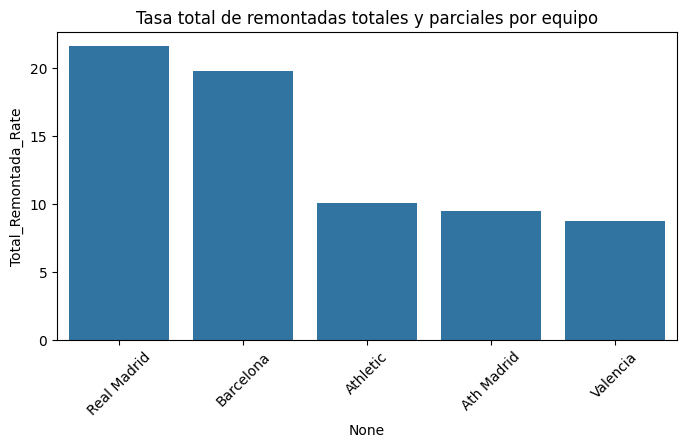

In [95]:
plt.figure(figsize=(8,4))
sns.barplot(x=team_global_stats.index, y='Total_Remontada_Rate', data=team_global_stats)
plt.title("Tasa total de remontadas totales y parciales por equipo")
plt.xticks(rotation=45)
plt.show()

## 7. Analisis

In [ ]:
goals_season = data.groupby("Season")["GolesPartido"].sum()

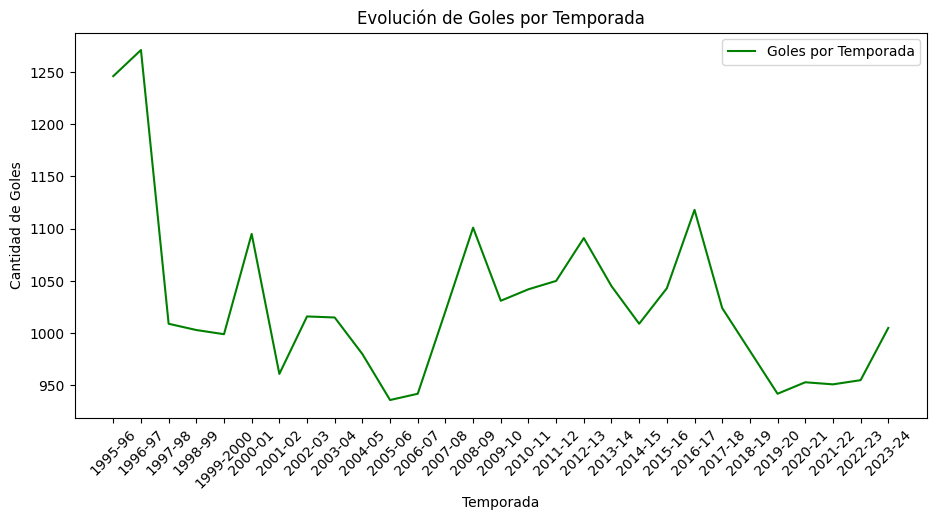

In [ ]:
plt.figure(figsize=(11, 5))
plt.plot(goals_season.index, 
         goals_season.values, 
         linestyle='-', 
         color='green', 
         label='Goles por Temporada',
         )

plt.xticks(goals_season.index)
plt.xticks(rotation=45)
plt.xlabel('Temporada')
plt.ylabel('Cantidad de Goles')
plt.title('Evoluci√≥n de Goles por Temporada')
plt.legend()

plt.show()
